## Introduction:
The data consists of 8732 .wav files. Of these files 5435 are used for training and 3297 used for testing a classification algorithm. The 5435 .wav files sit in the folder 'train' while the testing files reside in the 'test' folder. Both the mentioned folders are in the ipython notebook's directory. 

To be useful, .wav files need to be read as numpy arrays. P

In this notebook, all the .wav files are read and converted to numpy arrays. Furthermore, these new numpy arrays are pickled for easy future use. 




In [1]:
#import needed libraries

import librosa as lb #used for feature extracion and resampling
import numpy as np 
import matplotlib.pyplot as plt
import librosa.display #builds on matplotlib to draw nice spectrograms.
import IPython.display as ipd #used to play .wav files from notebook
import pandas as pd 
# from scipy.io import wavfile #can be used to import .wav files but does not work on 24 bit depth audio files


import soundfile as sf #soundfile enables loading 24 bit depth audio files.
import time #used to measure code runtime. 
import glob
from collections import defaultdict
import pickle
import seaborn as sns

In [2]:
#functions to be used in this exercise:

#function to read wave file and get numpy file:

def ReadAudio(filename):
    x,sr=sf.read(filename)
    x=np.array(x)
    x=x.T
    #x=x.T #transpose to match format of librosa array representation
    #set sample rate at 22050 to reduce memory usage. 
    #x=lb.resample(x,sr,22050)
        
    #change any stereo audio to mono.
    if x.shape[0] ==2:
        x=lb.to_mono(x)
     
    #change to a list.
    x=list(x)
    return x,sr


#function to check length of sound file (number of samples) and increase it till it is equal to numSamples
def IncreaseNumSamples(sound,numSamples):
    if len(sound)<numSamples:
        newSound=sound+[0]*(numSamples-len(sound))
    else:
        newSound=sound
    return newSound



TrainFiles=glob.glob('train\*.wav')
TestFiles=glob.glob('test\*.wav')


#Audios=defaultdict(list)
Props=defaultdict(list)


for file in TrainFiles:

    AudioList,SR=ReadAudio(file) #sampling rate, id, and array of the sound are saved into a dict

    Props['ID'].append(file)
    Props['SR'].append(SR)
    Props['length'].append(len(AudioList))
    Props['Max'].append(max(AudioList))
    Props['Min'].append(min(AudioList))
    Props['Average'].append(sum(AudioList)/len(AudioList))

for file in TestFiles:
    
    AudioList,SR=ReadAudio(file) #sampling rate, id, and array of the sound are saved into a dict

    Props['ID'].append(file)
    Props['SR'].append(SR)
    Props['length'].append(len(AudioList))
    Props['Max'].append(max(AudioList))
    Props['Min'].append(min(AudioList))
    Props['Average'].append(sum(AudioList)/len(AudioList))

        
        


PropsDF=pd.DataFrame.from_dict(Props)
PropsDF['Duration']=PropsDF['length']/PropsDF['SR']
assert len(PropsDF.index.unique())==len(PropsDF.index)
with open('DataSummary/SummaryDF.pickle', 'wb') as handle:
    pickle.dump(PropsDF, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [3]:
#Start From Here
with open('DataSummary/SummaryDF.pickle', 'rb') as handle:
    PropsDF=pickle.load(handle)
    
Category=pd.read_csv('train.csv')
Category['ID']=Category['ID'].astype('float64')
print(Category.info())
print(PropsDF.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
ID       5435 non-null float64
Class    5435 non-null object
dtypes: float64(1), object(1)
memory usage: 85.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 7 columns):
ID          8732 non-null object
SR          8732 non-null int64
length      8732 non-null int64
Max         8732 non-null float64
Min         8732 non-null float64
Average     8732 non-null float64
Duration    8732 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 477.6+ KB
None


In [4]:
PropsDF['RealID']=PropsDF.apply(lambda row: row['ID'][6:-4] if row['ID'][:2]=='tr' else row['ID'][5:-4],axis=1)

PropsDF.RealID=pd.to_numeric(PropsDF.RealID)
PropsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
ID          8732 non-null object
SR          8732 non-null int64
length      8732 non-null int64
Max         8732 non-null float64
Min         8732 non-null float64
Average     8732 non-null float64
Duration    8732 non-null float64
RealID      8732 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 545.8+ KB


In [5]:
PropsDF=pd.merge(PropsDF,Category,how='left',left_on='RealID',right_on='ID')

In [6]:
PropsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8732 entries, 0 to 8731
Data columns (total 10 columns):
ID_x        8732 non-null object
SR          8732 non-null int64
length      8732 non-null int64
Max         8732 non-null float64
Min         8732 non-null float64
Average     8732 non-null float64
Duration    8732 non-null float64
RealID      8732 non-null int64
ID_y        5435 non-null float64
Class       5435 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 750.4+ KB


In [7]:
with open('DataSummary/SummaryDFWithLabels.pickle', 'wb') as handle:
    pickle.dump(PropsDF,handle)

Text(0.5,1,'samplingRate Distribution')

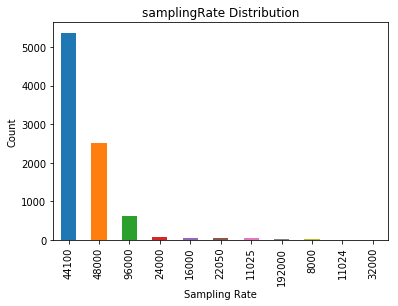

In [8]:
PropsDF['SR'].value_counts().plot(kind='bar')
plt.xlabel('Sampling Rate')
plt.ylabel('Count')
plt.title('samplingRate Distribution')

Text(0.5,1,'Duration Distribution')

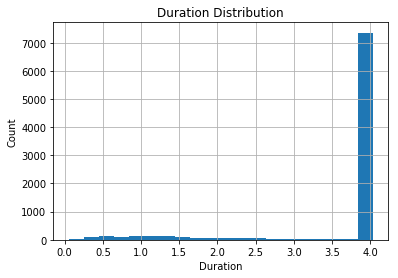

In [9]:
PropsDF['Duration'].hist(bins=20)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Duration Distribution')

Text(0.5,1,'Labels Distribution')

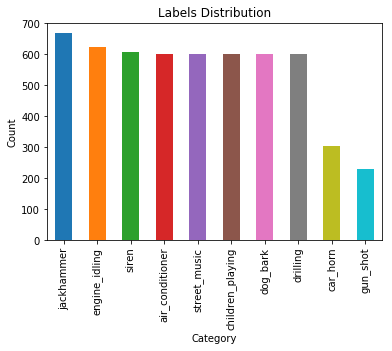

In [10]:
PropsDF['Class'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Labels Distribution')